In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle

import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize


In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:

df = pd.read_csv('hotel-reviews.csv')
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
df.drop_duplicates(subset ="Description", keep = "first", inplace = True)

In [6]:
df.shape

(38919, 5)

In [7]:
df['Description'] = df['Description'].astype('str')

In [8]:
#df.dropna()


In [9]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df['Description'].apply(get_polarity)

In [10]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [11]:
df['Sentiment_Type'].value_counts()

POSITIVE    35989
NEGATIVE     2848
NEUTRAL        82
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

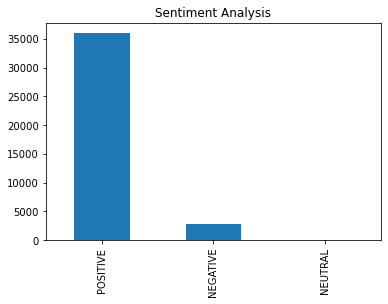

In [12]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [13]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [14]:
# Let's take a look at the updated text
df['Description'] = pd.DataFrame(df.Description.apply(cleaned))
df.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Polarity,Sentiment_Type
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,0.346190,POSITIVE
1,id10327,i stayed at the crown plaza april april th...,Internet Explorer,Mobile,not happy,0.042363,POSITIVE
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,0.124969,POSITIVE
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.718500,POSITIVE
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,0.117192,POSITIVE
5,id10331,we had rooms one was very nice and clearly ha...,InternetExplorer,Desktop,happy,0.205686,POSITIVE
6,id10332,my husband and i have stayed in this hotel a f...,Firefox,Tablet,not happy,0.151852,POSITIVE
7,id10333,my wife i stayed in this glorious city a whil...,Google Chrome,Mobile,happy,0.217632,POSITIVE
8,id10334,my boyfriend and i stayed at the fairmont on a...,Internet Explorer,Desktop,happy,0.333836,POSITIVE
9,id10335,wonderful staff great location but it was defi...,Chrome,Tablet,not happy,0.234167,POSITIVE
